In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./archive/creditcard.csv')

# 1. Exploratory Data Analysis

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df[df["Class"] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


<AxesSubplot:xlabel='Class', ylabel='count'>

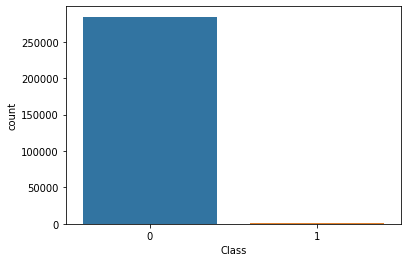

In [7]:
sns.countplot("Class",data=df)

Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

<AxesSubplot:title={'center':'Fraud Transaction'}, ylabel='Frequency'>

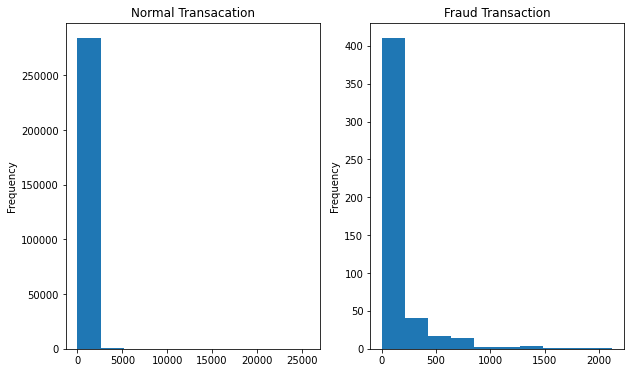

In [8]:
plt.figure(figsize=(10,6))
plt.subplot(121)
df[df["Class"] == 0].Amount.plot.hist(title="Normal Transacation")
plt.subplot(122)
df[df["Class"] == 1].Amount.plot.hist(title="Fraud Transaction")

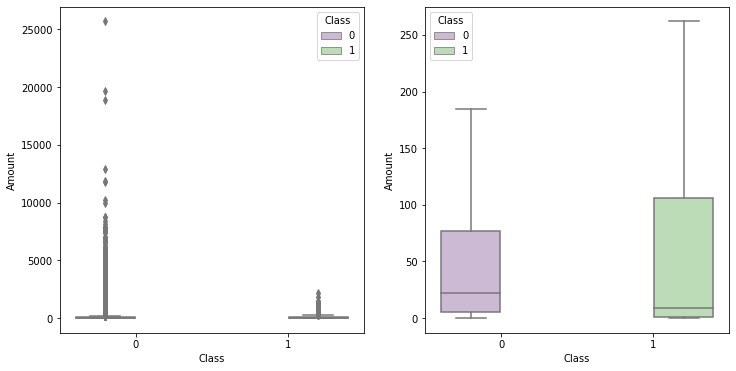

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

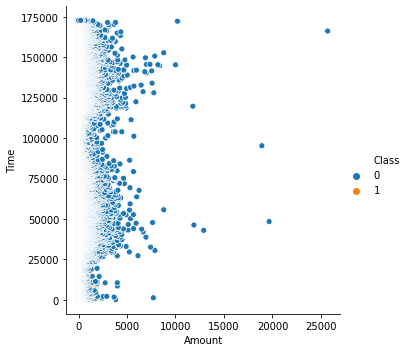

In [10]:
sns.relplot(x="Amount", y="Time", hue="Class", data=df)

(0.0, 172792.0)

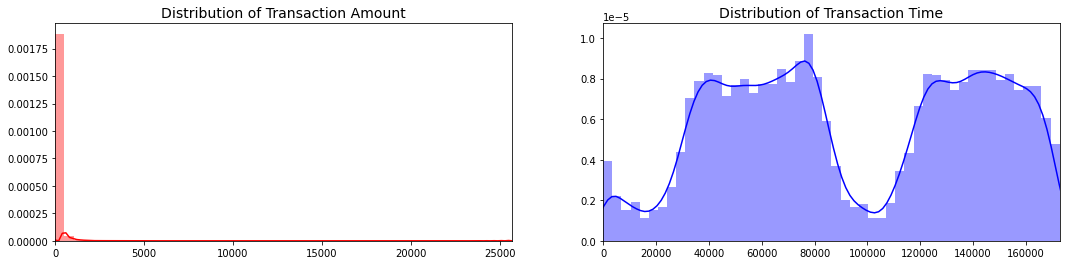

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [12]:
fraud_data = df[df["Class"] == 1]
normal_data = df[df["Class"] == 0]

In [13]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
normal_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:title={'center':'Not Fraud transactions for Time Distribution'}, xlabel='Time'>

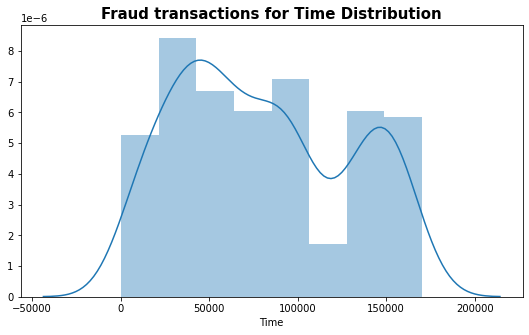

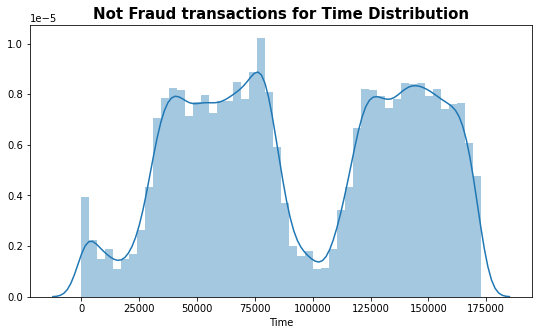

In [15]:
plt.figure(figsize = (9,5))
plt.title("Fraud transactions for Time Distribution",size=15, weight='bold')
sns.distplot(fraud_data['Time'])

plt.figure(figsize = (9,5))
plt.title("Not Fraud transactions for Time Distribution",size=15, weight='bold')
sns.distplot(normal_data['Time'])

Text(0.5, 1.0, 'Fraud Transactions')

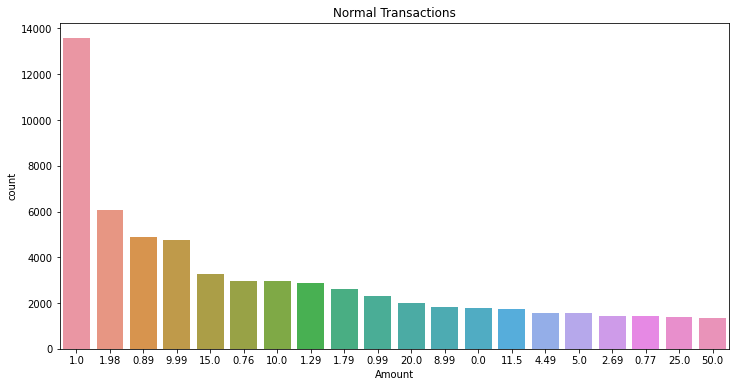

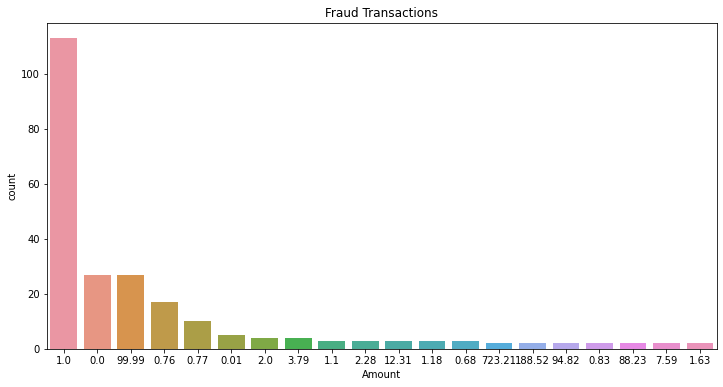

In [16]:
plt.figure(figsize = (12,6))
sns.countplot('Amount', order = normal_data['Amount'].value_counts().index[:20], data = normal_data)
plt.title('Normal Transactions')

plt.figure(figsize = (12,6))
sns.countplot('Amount', order = fraud_data['Amount'].value_counts().index[:20], data = fraud_data)
plt.title('Fraud Transactions')

Text(0.5, 1.0, 'Correlation Matrix')

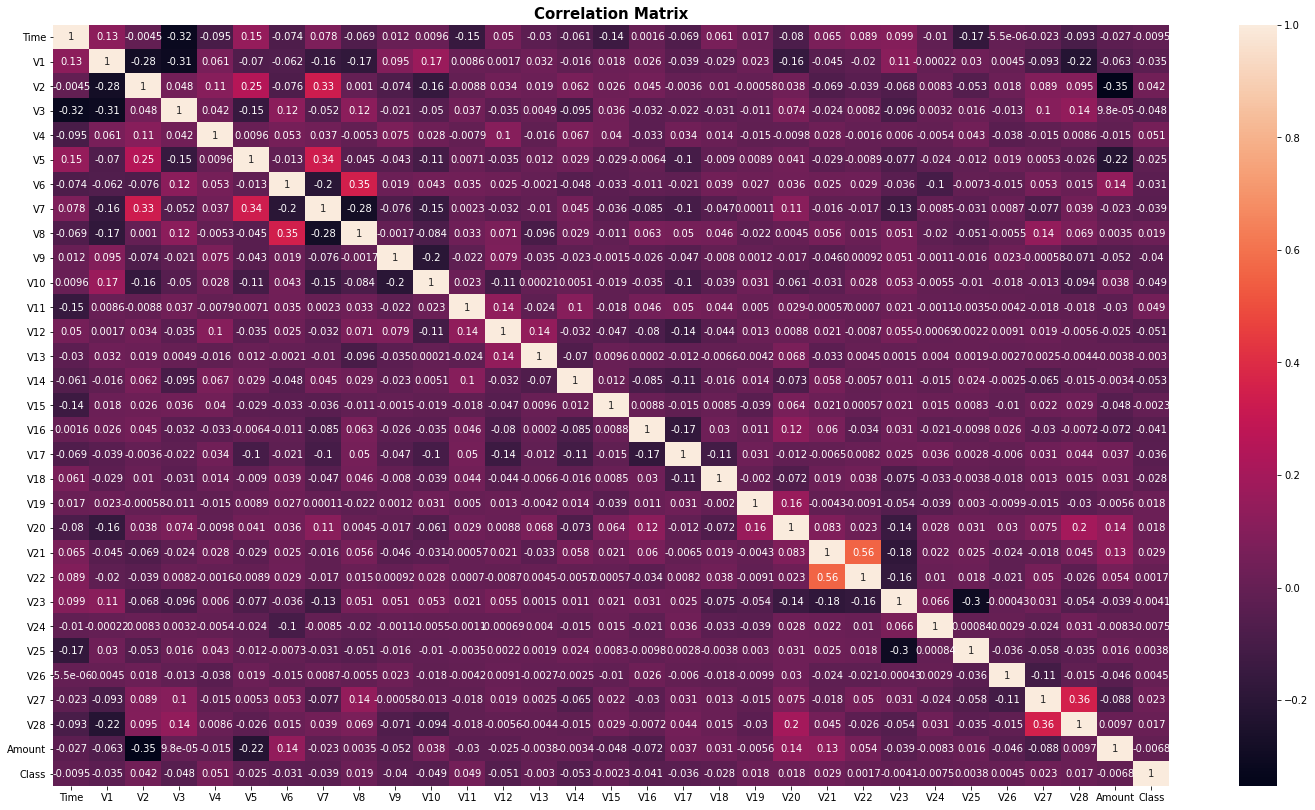

In [17]:
corrmat = df.corr(method='kendall')
plt.subplots(figsize=(25,14))
sns.heatmap(corrmat, annot=True)
plt.title("Correlation Matrix",size=15, weight='bold')

# 2. Scaling

In [18]:
X_stdsc = df.drop(["Class"], axis=1)

In [19]:
std_sc = StandardScaler()
X_scaled = std_sc.fit_transform(X_stdsc)

In [20]:
data = pd.DataFrame(data=X_scaled, columns=X_stdsc.columns)
data = pd.concat([data, df[["Class"]]], axis=1)

In [22]:
#pip install imblearn

# 3. Model Building

In [23]:
X = data.drop(["Class"], axis=1)
y = data[["Class"]]

In [24]:
#####
#X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, stratify=y, random_state=42)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data[['Class']].values, test_size=0.2,random_state=42)

In [26]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (227845, 30)
Y train shape:  (227845, 1)
X test shape:  (56962, 30)
Y test shape:  (56962, 1)


## 3.1. Synthetic Minority Oversampling Technique (SMOTE)

In [27]:
#####
#smt = SMOTE(random_state=0)
#X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [28]:
smote  = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

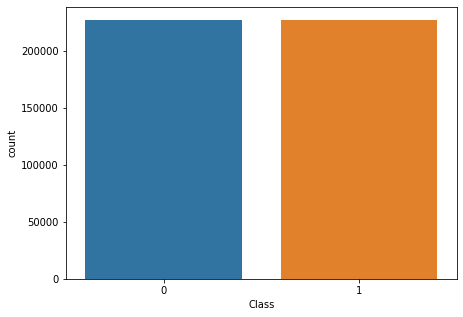

In [29]:
plt.figure(figsize = (7,5))
sns.countplot('Class', data = pd.DataFrame(y_train_sm, columns=["Class"]))

## 3.1.1. Logistic Regression

In [30]:
lr = LogisticRegression()
lr.fit(X_train_sm, y_train_sm)

LogisticRegression()

### Prediction

In [31]:
y_pred_lr = lr.predict(X_test)

In [32]:
sm_acc_lr  = round(lr.score(X_train_sm, y_train_sm)* 100, 2)

In [33]:
print ("LR Accuracy for SMOTE: " + str(sm_acc_lr) + ' percent')

LR Accuracy for SMOTE: 94.92 percent


In [34]:
train_acc_lr  = round(lr.score(X_train, y_train)* 100, 2)
test_acc_lr  = round(lr.score(X_test, y_test)* 100, 2)

In [35]:
print ('Test Accuracy: ' + str(test_acc_lr) + ' percent')
print ('Train Accuracy: ' + str(train_acc_lr) + ' percent')

Test Accuracy: 97.46 percent
Train Accuracy: 97.51 percent


### Classification Report

In [36]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



### Confusion Matrix

In [37]:
def plot_confusion_matrix(y_test, y_pred):
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf, annot=True)
    recall = cf[1,1]/(cf[1,0] + cf[1,1])
    precision = cf[1,1]/(cf[0,1] + cf[1,1])
    accuracy = (cf[0, 0] + cf[1,1])/ np.sum(cf)
    f1_score = (2*precision*recall)/(precision + recall)
    print('Recall: '+ str(recall) +'\nPrecision: '+ str(precision) +'\nAccuracy: '+ str(accuracy) +'\nF1-Score: '+ str(f1_score))

Recall: 0.9285714285714286
Precision: 0.05955497382198953
Accuracy: 0.9746497665110073
F1-Score: 0.11193111931119311


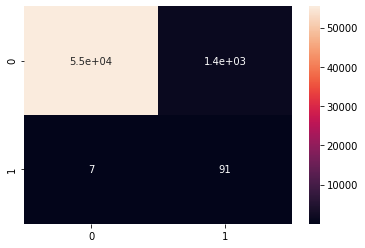

In [38]:
plot_confusion_matrix(y_test, y_pred_lr)

### ROC Curve

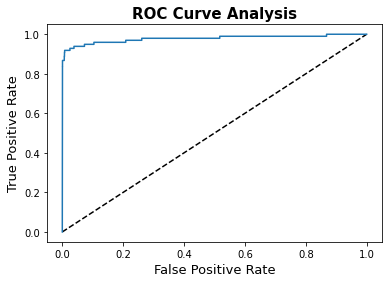

In [39]:
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

## 3.1.2. Naive Bayes Classification

In [40]:
nbcla = GaussianNB()
nbcla.fit(X_train_sm, y_train_sm)

GaussianNB()

### Prediction

In [41]:
Y_predict_nbcla = nbcla.predict(X_test)

In [42]:
sm_acc_nbcla  = round(nbcla.score(X_train_sm, y_train_sm)* 100, 2)

In [43]:
print ("Naive Bayes Accuracy for SMOTE: " + str(sm_acc_nbcla) + ' percent')

Naive Bayes Accuracy for SMOTE: 91.31 percent


In [44]:
test_acc_nbcla  = round(nbcla.score(X_test, y_test)* 100, 2)
train_acc_nbcla  = round(nbcla.score(X_train, y_train)* 100, 2)

In [45]:
print ('Test Accuracy: ' + str(test_acc_nbcla) + ' percent')
print ('Train Accuracy: ' + str(train_acc_nbcla) + ' percent')

Test Accuracy: 97.64 percent
Train Accuracy: 97.68 percent


### Classification Report

In [46]:
print(classification_report(y_test, Y_predict_nbcla))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.87      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



### Confusion Matrix

Recall: 0.8673469387755102
Precision: 0.060113154172560114
Accuracy: 0.9764404339735262
F1-Score: 0.11243386243386244


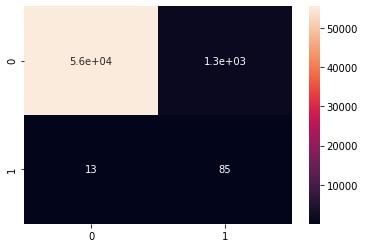

In [47]:
plot_confusion_matrix(y_test, Y_predict_nbcla)

### ROC Curve

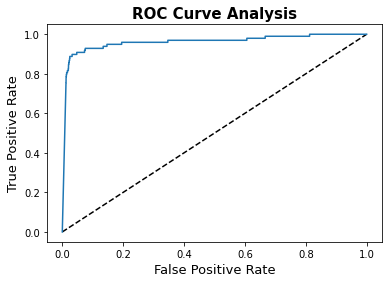

In [48]:
y_pred_prob = nbcla.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

## 3.1.3. Support Vector Classifier (SVC)

In [49]:
svc= SVC(kernel='rbf', random_state=0)
svc.fit(X_train_sm, y_train_sm)

SVC(random_state=0)

### Prediction

In [50]:
Y_predict_svc = svc.predict(X_test)

In [51]:
sm_acc_svc  = round(svc.score(X_train_sm, y_train_sm)* 100, 2)

In [52]:
print ("Support Vector Accuracy for SMOTE: " + str(sm_acc_svc) + ' percent')

Support Vector Accuracy for SMOTE: 98.27 percent


In [53]:
test_acc_svc  = round(svc.score(X_test, y_test)* 100, 2)
train_acc_svc  = round(svc.score(X_train, y_train)* 100, 2)

In [54]:
print ('Test Accuracy: ' + str(test_acc_svc) + ' percent')
print ('Train Accuracy: ' + str(train_acc_svc) + ' percent')

Test Accuracy: 98.45 percent
Train Accuracy: 98.51 percent


### Classification Report

In [55]:
print(classification_report(y_test, Y_predict_svc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962



### Confusion Matrix

Recall: 0.9081632653061225
Precision: 0.09241952232606439
Accuracy: 0.9844984375548611
F1-Score: 0.16776625824693683


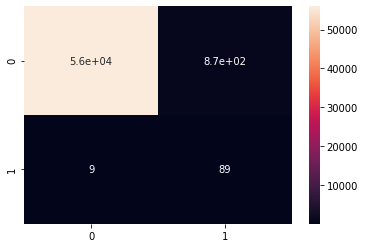

In [56]:
plot_confusion_matrix(y_test, Y_predict_svc)

## 3.1.4. Random Forest Classifier

In [58]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

### Prediction

In [59]:
Y_predict_rfc = rfc.predict(X_test)

In [60]:
sm_acc_rfc  = round(rfc.score(X_train_sm, y_train_sm)* 100, 2)

In [61]:
print ("Random Forest Accuracy for SMOTE: " + str(sm_acc_rfc) + ' percent')

Random Forest Accuracy for SMOTE: 100.0 percent


In [62]:
test_acc_rfc  = round(rfc.score(X_test, y_test)* 100, 2)
train_acc_rfc  = round(rfc.score(X_train, y_train)* 100, 2)

In [63]:
print ('Test Accuracy: ' + str(test_acc_rfc) + ' percent')
print ('Train Accuracy: ' + str(train_acc_rfc) + ' percent')

Test Accuracy: 99.96 percent
Train Accuracy: 100.0 percent


### Classification Report

In [64]:
print(classification_report(y_test, Y_predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



### Confusion Matrix

Recall: 0.8469387755102041
Precision: 0.9120879120879121
Accuracy: 0.9995962220427653
F1-Score: 0.8783068783068784


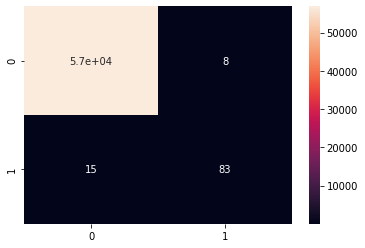

In [65]:
plot_confusion_matrix(y_test, Y_predict_rfc)

### ROC Curve

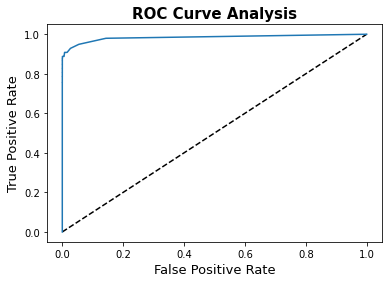

In [66]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

## 3.1.5. Decision Tree Classifier

In [67]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Prediction

In [68]:
Y_predict_dtc = dtc.predict(X_test)

In [69]:
sm_acc_dtc  = round(dtc.score(X_train_sm, y_train_sm)* 100, 2)
print ("Decision Tree Accuracy for SMOTE: " + str(sm_acc_dtc) + ' percent')

Decision Tree Accuracy for SMOTE: 100.0 percent


In [70]:
test_acc_dtc  = round(dtc.score(X_test, y_test)* 100, 2)
train_acc_dtc  = round(dtc.score(X_train, y_train)* 100, 2)

In [71]:
print ('Test Accuracy: ' + str(test_acc_dtc) + ' percent')
print ('Train Accuracy: ' + str(train_acc_dtc) + ' percent')

Test Accuracy: 99.8 percent
Train Accuracy: 100.0 percent


### Classification Report

In [72]:
print(classification_report(y_test, Y_predict_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.46      0.77      0.57        98

    accuracy                           1.00     56962
   macro avg       0.73      0.88      0.79     56962
weighted avg       1.00      1.00      1.00     56962



### Confusion Matrix

Recall: 0.7653061224489796
Precision: 0.4573170731707317
Accuracy: 0.9980337769039008
F1-Score: 0.5725190839694656


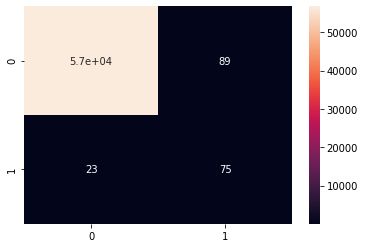

In [73]:
plot_confusion_matrix(y_test, Y_predict_dtc)

### ROC Curve

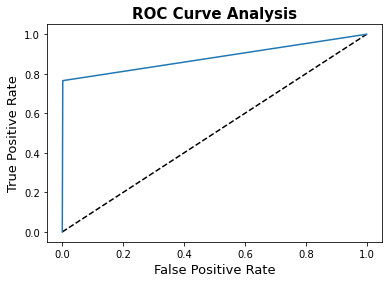

In [74]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

## 3.1.6. K-Neighbors Classifier

In [77]:
knc = KNeighborsClassifier()
knc.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

### Prediction

In [78]:
Y_predict_knc = knc.predict(X_test)

In [79]:
sm_acc_knc  = round(knc.score(X_train_sm, y_train_sm)* 100, 2)
print ("K-Neighbors Accuracy for SMOTE: " + str(sm_acc_knc) + ' percent')

K-Neighbors Accuracy for SMOTE: 99.95 percent


In [80]:
test_acc_knc  = round(knc.score(X_test, y_test)* 100, 2)
train_acc_knc  = round(knc.score(X_train, y_train)* 100, 2)

In [81]:
print ('Test Accuracy: ' + str(test_acc_knc) + ' percent')
print ('Train Accuracy: ' + str(train_acc_knc) + ' percent')

Test Accuracy: 99.82 percent
Train Accuracy: 99.89 percent


### Classification Report

In [82]:
print(classification_report(y_test, Y_predict_knc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.48      0.87      0.62        98

    accuracy                           1.00     56962
   macro avg       0.74      0.93      0.81     56962
weighted avg       1.00      1.00      1.00     56962



### Confusion Matrix

Recall: 0.8673469387755102
Precision: 0.480225988700565
Accuracy: 0.998156665847407
F1-Score: 0.6181818181818182


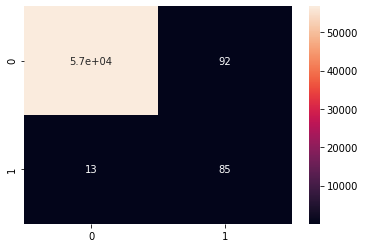

In [83]:
plot_confusion_matrix(y_test, Y_predict_knc)

### ROC Curve

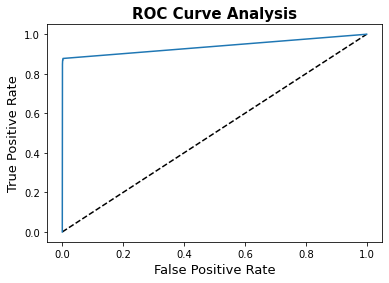

In [84]:
y_pred_prob = knc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

# 4. Undersampling

In [85]:
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

In [86]:
#rus.fit(X, y)
#X_resampled, y_resampled = rus.sample(X, y)

<AxesSubplot:xlabel='Class', ylabel='count'>

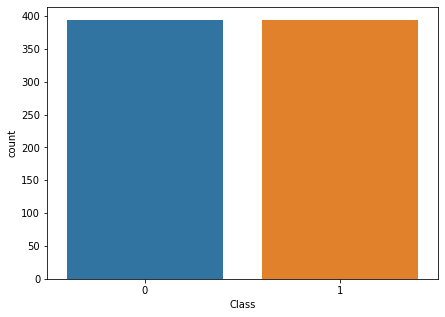

In [87]:
plt.figure(figsize = (7,5))
sns.countplot('Class', data = pd.DataFrame(y_train_rus, columns=["Class"]))

## 4.1.1. Logistic Regression

In [88]:
lr_rus = LogisticRegression()
lr_rus.fit(X_train_rus, y_train_rus)

LogisticRegression()

### Prediction

In [89]:
y_pred_lr_rus = lr_rus.predict(X_test)

In [90]:
rus_acc_lr  = round(lr_rus.score(X_train_rus, y_train_rus)* 100, 2)
print ("LR Accuracy for Undersampling: " + str(rus_acc_lr) + ' percent')

LR Accuracy for Undersampling: 95.3 percent


In [91]:
train_acc_lr_rus  = round(lr_rus.score(X_train, y_train)* 100, 2)
test_acc_lr_rus  = round(lr_rus.score(X_test, y_test)* 100, 2)

In [92]:
print ('Test Accuracy: ' + str(test_acc_lr_rus) + ' percent')
print ('Train Accuracy: ' + str(train_acc_lr_rus) + ' percent')

Test Accuracy: 97.33 percent
Train Accuracy: 97.35 percent


### Classification Report

In [93]:
print(classification_report(y_test, y_pred_lr_rus))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



### Confusion Matrix

Recall: 0.9285714285714286
Precision: 0.056768558951965066
Accuracy: 0.9733330992591552
F1-Score: 0.10699588477366255


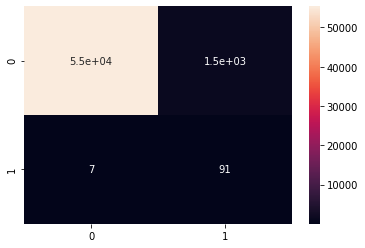

In [94]:
plot_confusion_matrix(y_test, y_pred_lr_rus)

### ROC Curve

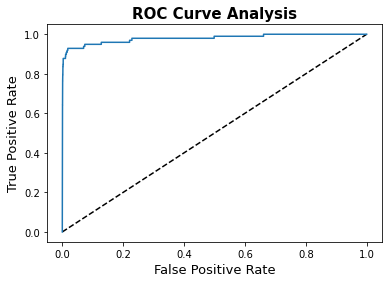

In [95]:
y_pred_prob = lr_rus.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

## 4.1.2. Naive Bayes Classification

In [96]:
nbcla_rus = GaussianNB()
nbcla_rus.fit(X_train_rus, y_train_rus)

GaussianNB()

### Prediction 

In [97]:
y_pred_nbcla_rus = nbcla_rus.predict(X_test)

In [98]:
rus_acc_nbcla  = round(nbcla_rus.score(X_train_rus, y_train_rus)* 100, 2)
print ("Naive Bayes Accuracy for Undersampling: " + str(rus_acc_nbcla) + ' percent')

Naive Bayes Accuracy for Undersampling: 91.62 percent


In [99]:
train_acc_nbcla_rus  = round(nbcla_rus.score(X_train, y_train)* 100, 2)
test_acc_nbcla_rus  = round(nbcla_rus.score(X_test, y_test)* 100, 2)

In [100]:
print ('Test Accuracy: ' + str(test_acc_nbcla_rus) + ' percent')
print ('Train Accuracy: ' + str(train_acc_nbcla_rus) + ' percent')

Test Accuracy: 96.93 percent
Train Accuracy: 96.95 percent


### Classification Report

In [101]:
print(classification_report(y_test, y_pred_nbcla_rus))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.87      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



### Confusion Matrix

Recall: 0.8673469387755102
Precision: 0.04662643993417444
Accuracy: 0.9692602085600927
F1-Score: 0.08849557522123894


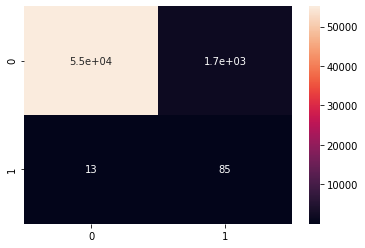

In [102]:
plot_confusion_matrix(y_test, y_pred_nbcla_rus)

### ROC Curve 

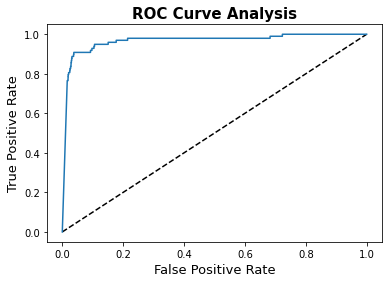

In [103]:
y_pred_prob = nbcla_rus.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

## 4.1.3. Support Vector Classifier

In [120]:
svc_rus = SVC(kernel='linear')
svc_rus.fit(X_train_rus, y_train_rus)

SVC(kernel='linear')

### Prediction

In [121]:
y_pred_svc_rus = svc_rus.predict(X_test)

In [122]:
rus_acc_svc  = round(svc_rus.score(X_train_rus, y_train_rus)* 100, 2)
print ("Support Vector Accuracy for Undersampling: " + str(rus_acc_svc) + ' percent')

Support Vector Accuracy for Undersampling: 95.43 percent


In [123]:
train_acc_svc_rus  = round(svc_rus.score(X_train, y_train)* 100, 2)
test_acc_svc_rus  = round(svc_rus.score(X_test, y_test)* 100, 2)

In [124]:
print ('Test Accuracy: ' + str(test_acc_svc_rus) + ' percent')
print ('Train Accuracy: ' + str(train_acc_svc_rus) + ' percent')

Test Accuracy: 97.65 percent
Train Accuracy: 97.6 percent


### Classification Report

In [125]:
print(classification_report(y_test, y_pred_svc_rus))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



### Confusion Matrix

Recall: 0.9081632653061225
Precision: 0.06276445698166432
Accuracy: 0.9765106562269583
F1-Score: 0.11741424802110818


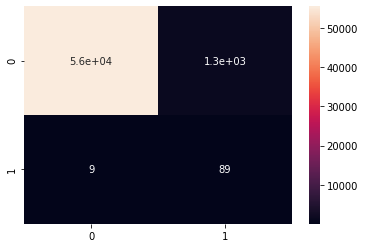

In [126]:
plot_confusion_matrix(y_test, y_pred_svc_rus)

## 4.1.4. Random Forest Classifier

In [127]:
rfc_rus = RandomForestClassifier(n_estimators=100)
rfc_rus.fit(X_train_rus, y_train_rus)

RandomForestClassifier()

### Prediction

In [128]:
y_pred_rfc_rus = rfc_rus.predict(X_test)

In [129]:
rus_acc_rfc  = round(rfc_rus.score(X_train_rus, y_train_rus)* 100, 2)
print ("Random Forest Accuracy for Undersampling: " + str(rus_acc_rfc) + ' percent')

Random Forest Accuracy for Undersampling: 100.0 percent


In [130]:
train_acc_rfc_rus  = round(rfc_rus.score(X_train, y_train)* 100, 2)
test_acc_rfc_rus  = round(rfc_rus.score(X_test, y_test)* 100, 2)

In [131]:
print ('Test Accuracy: ' + str(test_acc_rfc_rus) + ' percent')
print ('Train Accuracy: ' + str(train_acc_rfc_rus) + ' percent')

Test Accuracy: 98.16 percent
Train Accuracy: 98.14 percent


### Classification Report

In [132]:
print(classification_report(y_test, y_pred_rfc_rus))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.93      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.57     56962
weighted avg       1.00      0.98      0.99     56962



### Confusion Matrix 

Recall: 0.9285714285714286
Precision: 0.0803886925795053
Accuracy: 0.9816017696007865
F1-Score: 0.14796747967479676


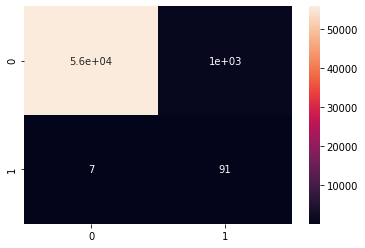

In [133]:
plot_confusion_matrix(y_test, y_pred_rfc_rus)

### ROC Curve

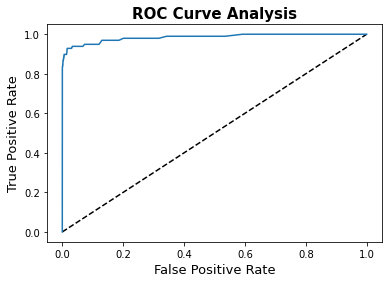

In [134]:
y_pred_prob = rfc_rus.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

## 4.1.5. Decision Tree Classifier

In [135]:
dtc_rus = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc_rus.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Prediction

In [136]:
y_pred_dtc_rus = dtc_rus.predict(X_test)

In [137]:
rus_acc_dtc  = round(dtc_rus.score(X_train_rus, y_train_rus)* 100, 2)
print ("Decision Tree Accuracy for Undersampling: " + str(rus_acc_dtc) + ' percent')

Decision Tree Accuracy for Undersampling: 100.0 percent


In [138]:
train_acc_dtc_rus  = round(dtc_rus.score(X_train, y_train)* 100, 2)
test_acc_dtc_rus  = round(dtc_rus.score(X_test, y_test)* 100, 2)

In [139]:
print ('Test Accuracy: ' + str(test_acc_dtc_rus) + ' percent')
print ('Train Accuracy: ' + str(train_acc_dtc_rus) + ' percent')

Test Accuracy: 91.12 percent
Train Accuracy: 91.09 percent


### Classification Report

In [140]:
print(classification_report(y_test, y_pred_dtc_rus))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.91      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.91      0.95     56962



### Confusion Matrix

Recall: 0.9081632653061225
Precision: 0.017318544463903483
Accuracy: 0.9111864049717355
F1-Score: 0.03398892495703647


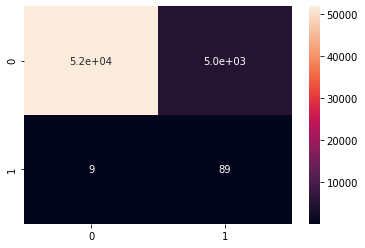

In [141]:
plot_confusion_matrix(y_test, y_pred_dtc_rus)

### ROC Curve

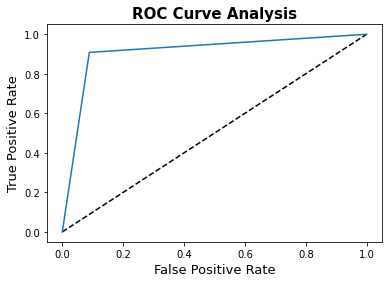

In [142]:
y_pred_prob = dtc_rus.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

## 4.1.6. K-Neighbors Classifier

In [143]:
knc_rus = KNeighborsClassifier()
knc_rus.fit(X_train_rus, y_train_rus)

KNeighborsClassifier()

### Prediction

In [144]:
y_pred_knc_rus = knc_rus.predict(X_test)

In [145]:
rus_acc_knc  = round(knc_rus.score(X_train_rus, y_train_rus)* 100, 2)
print ("K-Neighbors Accuracy for Undersampling: " + str(rus_acc_knc) + ' percent')

K-Neighbors Accuracy for Undersampling: 94.8 percent


In [146]:
train_acc_knc_rus  = round(knc_rus.score(X_train, y_train)* 100, 2)
test_acc_knc_rus  = round(knc_rus.score(X_test, y_test)* 100, 2)

In [147]:
print ('Test Accuracy: ' + str(test_acc_knc_rus) + ' percent')
print ('Train Accuracy: ' + str(train_acc_knc_rus) + ' percent')

Test Accuracy: 97.93 percent
Train Accuracy: 97.98 percent


### Classification Report

In [148]:
print(classification_report(y_test, y_pred_knc_rus))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



### Confusion Matrix

Recall: 0.9081632653061225
Precision: 0.07080350039777247
Accuracy: 0.9793371019276008
F1-Score: 0.13136531365313653


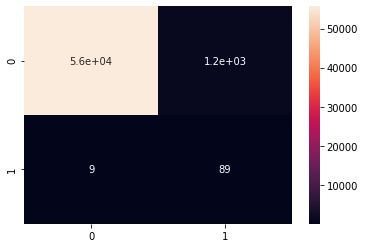

In [149]:
plot_confusion_matrix(y_test, y_pred_knc_rus)

### ROC Curve

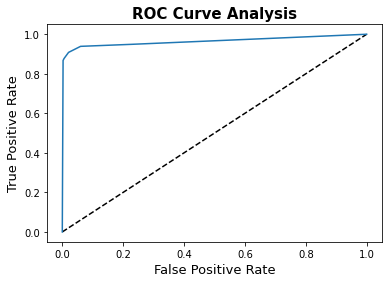

In [150]:
y_pred_prob = knc_rus.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()

# 5. Conclusion

## 5.1. SMOTE EVALUATION

In [159]:
SMOTE_Result = {'Models':['Random Forest Classifier', 'Decision Tree Classifier','Logistic Regression Classifier', 'Support Vector Classifier (SVC)', 'K-Nearest Neighbors Classifier', 'Gaussian Naive Bayes'],
        'Recall':[0.84, 0.76, 0.92, 0.90, 0.86, 0.86],
        'Precision':[0.91, 0.45, 0.05, 0.09, 0.48, 0.06],
        'Accuracy':[0.99, 0.99, 0.97, 0.98, 0.99, 0.97],
        'F1-Score':[0.87, 0.57, 0.11, 0.16, 0.61, 0.11]} 

In [160]:
SMOTE_Result = pd.DataFrame(SMOTE_Result)
SMOTE_Result.reset_index(inplace = True, drop=True)

In [161]:
SMOTE_Result

,Models,Recall,Precision,Accuracy,F1-Score
0,Random Forest Classifier,0.84,0.91,0.99,0.87
1,Decision Tree Classifier,0.76,0.45,0.99,0.57
2,Logistic Regression Classifier,0.92,0.05,0.97,0.11
3,Support Vector Classifier (SVC),0.90,0.09,0.98,0.16
4,K-Nearest Neighbors Classifier,0.86,0.48,0.99,0.61
5,Gaussian Naive Bayes,0.86,0.06,0.97,0.11


1. Since our Logistic Regression model has the highest Recall Score (0.928) compared to other models it is best in predict the fraud transaction but it has poor Precision Score (0.05) from others.
2. In terms of maintaining good Recall Score (0.84), Precision Score (0.91), Highest Accuracy (0.99) and F1-Score (0.87) the Random Forest Model performs better than Logistic Regression.

## 5.2. Undersampling EVALUATION

In [162]:
Undersampling_Result = {'Models':['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier (SVC)', 'Decision Tree', 'Gaussian Naive Bayes'],
        'Recall':[0.92, 0.92, 0.90, 0.90, 0.90, 0.86],
        'Precision':[0.08, 0.05, 0.07, 0.06, 0.01, 0.04],
        'Accuracy':[0.98, 0.97, 0.97, 0.97, 0.91, 0.96],
        'F1-Score':[0.14, 0.10, 0.13, 0.11, 0.03, 0.08]} 

In [163]:
Undersampling_Result = pd.DataFrame(Undersampling_Result)
Undersampling_Result.reset_index(inplace = True, drop=True)

In [164]:
Undersampling_Result

,Models,Recall,Precision,Accuracy,F1-Score
0,Random Forest,0.92,0.08,0.98,0.14
1,Logistic Regression,0.92,0.05,0.97,0.10
2,K-Nearest Neighbors,0.90,0.07,0.97,0.13
3,Support Vector Classifier (SVC),0.90,0.06,0.97,0.11
4,Decision Tree,0.90,0.01,0.91,0.03
5,Gaussian Naive Bayes,0.86,0.04,0.96,0.08


1. Random Forest performs well with excellent Recall (0.92), Precision Score (0.08), Accuracy (0.98) and F1 Score (0.14) respectively.
2. Followed by Logistic Regression with excellent Recall (0.92), Precision Score (0.05), Accuracy (0.97) and F1 Score (0.10).